In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [2]:
dfLabel = pd.read_csv("./GOOGL_weekly_return_volatility.csv")
dfDetail = pd.read_csv("./GOOGL_weekly_return_volatility_detailed.csv")

In [3]:
# Add label to detail
labelMap = {}
for (y, w, l) in zip(dfLabel.Year, dfLabel.Week_Number, dfLabel.label):
    key = (y, w)
    value = l
    labelMap[key] = value

temp = []
for (y, w) in zip(dfDetail.Year, dfDetail.Week_Number):
    key = (y, w)
    temp.append(labelMap[key])

# Extract data
dfDetail['Label'] = temp
dfDetail = dfDetail[['Year', 'Week_Number', 'Close', 'Label']]
dfDetail

# Cut into two year
goo2019 = dfDetail[:252]
goo2020 = dfDetail[252:]
goo2020 = goo2020.reset_index(drop=True)

# Cut into week 
## Cut goo2019
goo2019Week = []
for i in range(53):
    temp = goo2019[goo2019.Week_Number == i]
    temp = temp.reset_index(drop=True)
    goo2019Week.append(temp)
## Cut goo2020
goo2020Week = []
for i in range(53):
    temp = goo2020[goo2020.Week_Number == i]
    temp = temp.reset_index(drop=True)
    goo2020Week.append(temp)

## Combine two year
gooWeek = goo2019Week + goo2020Week

In [4]:
# Following weekly account
def proficCalculator(data, fund):
    # Week 0 case
    week1Data = data[0]
    week1Label = week1Data.Label[0] # week 0 label
    account = []

    if week1Label == 1:
        stock = True
        buyPrice = week1Data.Close[0] # week 0 first day price
        sellPrice = week1Data.Close[len(week1Data)-1] # week 0 last day price
    else:
        stock = False
        buyPrice = week1Data.Close[len(week1Data)-1] # week 0 last day price
        sellPrice = week1Data.Close[len(week1Data)-1] # week 0 last day price


    for df in data[1:]:
        account.append(fund)

        nextWeekColor = df.Label[0]
        nextClosePrice = df.Close[len(df)-1]

        # stock + green = no action
        if (stock == True) and (nextWeekColor == 1):
            stock == True # Keep holding the stock
            buyPrice = buyPrice # Buy point stay
            sellPrice = nextClosePrice # Sell point move forward

        # stock + red = sell
        elif (stock == True) and (nextWeekColor == 0):
            r = 1 + (sellPrice - buyPrice) / sellPrice
            fund = fund * r
            buyPrice = nextClosePrice
            sellPrice = nextClosePrice
            stock = False
            
        # money + green = buy stock
        elif (stock == False) and (nextWeekColor == 1):
            buyPrice = buyPrice
            sellPrice = nextClosePrice
            stock = True
        # money + red = no action
        elif (stock == False) and (nextWeekColor == 0):
            buyPrice = nextClosePrice
            sellPrice = nextClosePrice
            stock = False

    # Last withdraw
    r = 1 + (sellPrice - buyPrice) / sellPrice
    fund = fund * r
    return fund, account


final: 179.90958474908237, average balance: 135.9156255072861, volatility: 3.2166717859723377
0 12.508504542118231 100 179.90958474908237
52 0
final: 200.03250615354685, average balance: 141.39791582592005, volatility: 4.385902756990031
-2.6335840692597117 17.168054321920238 100 199.79201171112916
27 1


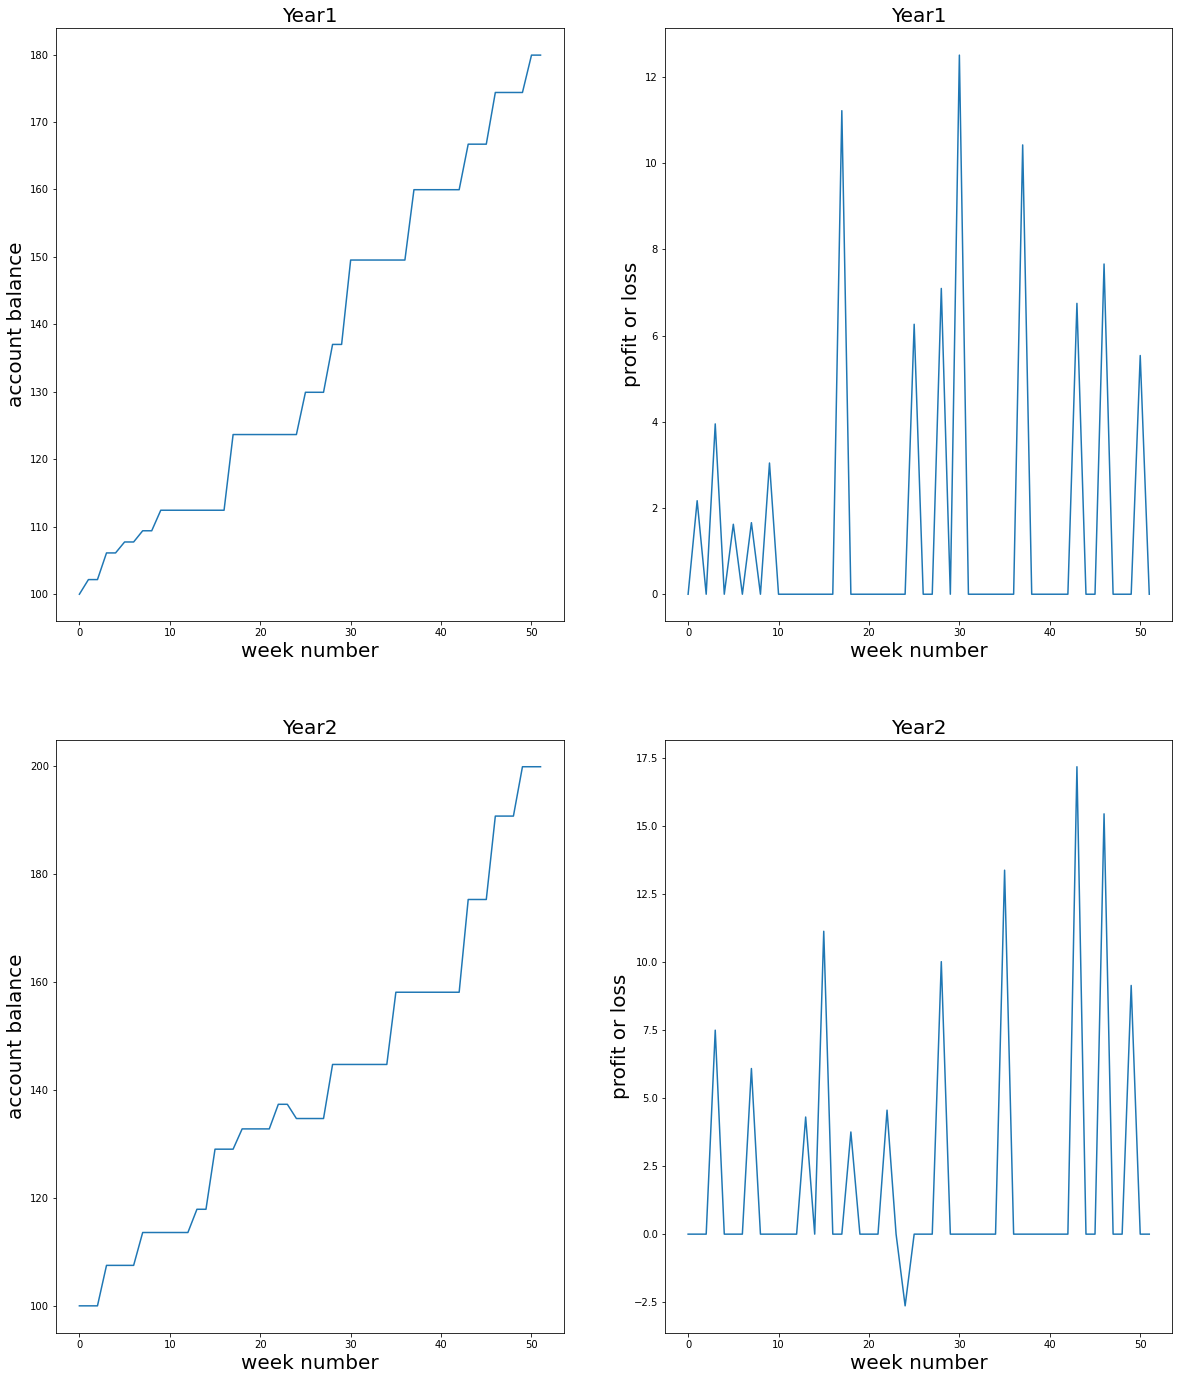

In [47]:
fig = plt.figure()
fig.set_size_inches(20,24)

# goo 2019 year 1
balance = [0]
total, account1 = proficCalculator(goo2019Week, 100)
for i in range(1, len(account1)):
    balance.append(account1[i] - account1[i-1])

## plot account
y1 = fig.add_subplot(2,2,1)
y2 = fig.add_subplot(2,2,2)

y1.set_title('Year1', fontsize=20)
y1.set_xlabel('week number', fontsize=20)
y1.set_ylabel('account balance', fontsize=20)

weekNumber = [ i for i in range(len(account1))]
y1.plot(weekNumber, account1)

## plot weekly change 
y2.set_title('Year1', fontsize=20)
y2.set_xlabel('week number', fontsize=20)
y2.set_ylabel('profit or loss', fontsize=20)
y2.plot(weekNumber, balance)

## max days of increasing and max days of decreasing
maxIn = 0
check = 0
for b in balance:
    if b >= 0:
        check += 1
        maxIn = max(check, maxIn)
    else:
        check = 0


maxDe = 0
check = 0
for b in balance:
    if b < 0:
        check += 1
        maxDe = max(check, maxDe)
    else:

        check = 0
   



print('final: {}, average balance: {}, volatility: {}'.format(total, sum(account1) / len(account1), statistics.stdev(balance)))
print(min(balance), max(balance), min(account1), max(account1))
print(maxIn, maxDe)






# goo 2020 year 2 
balance = [0]
total, account1 = proficCalculator(goo2020Week, 100)
for i in range(1, len(account1)):
    balance.append(account1[i] - account1[i-1])


y3 = fig.add_subplot(2,2,3)
y4 = fig.add_subplot(2,2,4)

## plot account
y3.set_title('Year2', fontsize=20)
y3.set_xlabel('week number', fontsize=20)
y3.set_ylabel('account balance', fontsize=20)

weekNumber = [ i for i in range(len(account1))]
y3.plot(weekNumber, account1)

## plot balance
y4.set_title('Year2', fontsize=20)
y4.set_xlabel('week number', fontsize=20)
y4.set_ylabel('profit or loss', fontsize=20)
y4.plot(weekNumber, balance)

## max days of increasing and max days of decreasing
maxIn = 0
check = 0
for b in balance:
    if b >= 0:
        check += 1
        maxIn = max(check, maxIn)
    else:
        check = 0


maxDe = 0
check = 0
for b in balance:
    if b < 0:
        check += 1
        maxDe = max(check, maxDe)
    else:

        check = 0
    


print('final: {}, average balance: {}, volatility: {}'.format(total, sum(account1) / len(account1), statistics.stdev(balance)))
print(min(balance), max(balance), min(account1), max(account1))
print(maxIn, maxDe)

